In [1]:
import os
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# to get deterministic output
#torch.manual_seed(123)

sys.path.append(os.path.abspath(".."))

### Hyperparameters

In [2]:
batch_size = 128
lr = 0.0002
latent_dim = 100
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### DataLoader

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # scale to [-1, 1]
])

train_ds = datasets.MNIST(root="../datasets/mnist", train=True, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

print("Train set:", len(train_ds))

Train set: 60000


### Visualize the Dataset

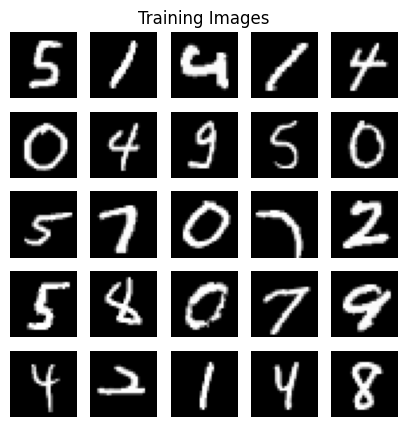

In [4]:
for images, _ in train_loader:  
    break

grid = images.view(-1, 28, 28).numpy()

plt.figure(figsize=(5,5))
plt.title("Training Images")
plt.axis("off")
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.imshow(grid[k], cmap="gray")
    plt.axis("off")
plt.show()

### Generator Model

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), 1, 28, 28)

### Discriminator Model

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        flat = img.view(img.size(0), -1)
        return self.model(flat)

### Training Loop

In [7]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

Epoch: 001/050 | d_loss: 0.5819 | g_loss: 1.6896
Epoch: 002/050 | d_loss: 0.4918 | g_loss: 0.7010
Epoch: 003/050 | d_loss: 0.2975 | g_loss: 1.3640
Epoch: 004/050 | d_loss: 0.5879 | g_loss: 0.5310
Epoch: 005/050 | d_loss: 0.4258 | g_loss: 0.9026
Epoch: 006/050 | d_loss: 0.3491 | g_loss: 1.0720
Epoch: 007/050 | d_loss: 0.6803 | g_loss: 0.4322
Epoch: 008/050 | d_loss: 0.3909 | g_loss: 1.4655
Epoch: 009/050 | d_loss: 0.4416 | g_loss: 3.1659
Epoch: 010/050 | d_loss: 0.3015 | g_loss: 1.4331


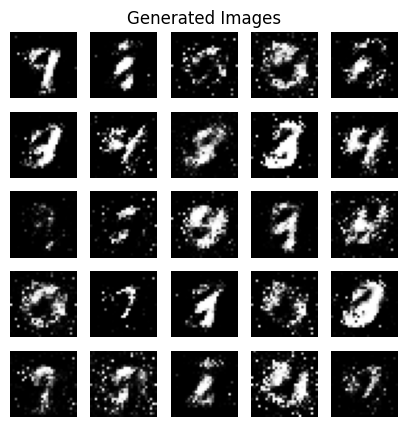

Epoch: 011/050 | d_loss: 0.3312 | g_loss: 2.1531
Epoch: 012/050 | d_loss: 0.3915 | g_loss: 2.3409
Epoch: 013/050 | d_loss: 0.3710 | g_loss: 1.3736
Epoch: 014/050 | d_loss: 0.3721 | g_loss: 1.4668
Epoch: 015/050 | d_loss: 0.4979 | g_loss: 0.8361
Epoch: 016/050 | d_loss: 0.4998 | g_loss: 0.7479
Epoch: 017/050 | d_loss: 0.5677 | g_loss: 1.8192
Epoch: 018/050 | d_loss: 0.6841 | g_loss: 1.9868
Epoch: 019/050 | d_loss: 0.5059 | g_loss: 1.1455
Epoch: 020/050 | d_loss: 0.5926 | g_loss: 0.9539


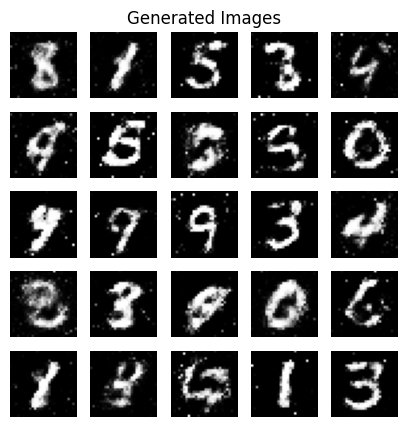

Epoch: 021/050 | d_loss: 0.5437 | g_loss: 1.0880
Epoch: 022/050 | d_loss: 0.5495 | g_loss: 0.7927
Epoch: 023/050 | d_loss: 0.5936 | g_loss: 0.9173
Epoch: 024/050 | d_loss: 0.5511 | g_loss: 0.6522
Epoch: 025/050 | d_loss: 0.6284 | g_loss: 1.4075
Epoch: 026/050 | d_loss: 0.5830 | g_loss: 1.0041
Epoch: 027/050 | d_loss: 0.6754 | g_loss: 1.6390
Epoch: 028/050 | d_loss: 0.5726 | g_loss: 0.9925
Epoch: 029/050 | d_loss: 0.5937 | g_loss: 0.8947
Epoch: 030/050 | d_loss: 0.6015 | g_loss: 0.8699


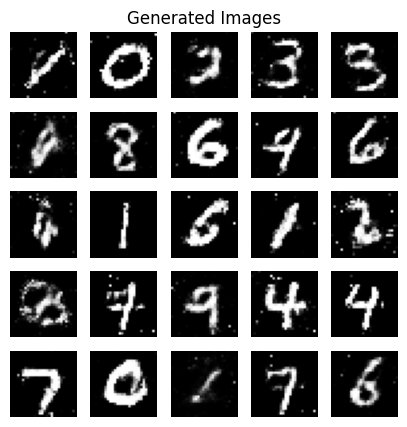

Epoch: 031/050 | d_loss: 0.5870 | g_loss: 1.3164
Epoch: 032/050 | d_loss: 0.5894 | g_loss: 1.2128
Epoch: 033/050 | d_loss: 0.6203 | g_loss: 0.6109
Epoch: 034/050 | d_loss: 0.6265 | g_loss: 1.2502
Epoch: 035/050 | d_loss: 0.6022 | g_loss: 1.0925
Epoch: 036/050 | d_loss: 0.5951 | g_loss: 1.1737
Epoch: 037/050 | d_loss: 0.5527 | g_loss: 0.9624
Epoch: 038/050 | d_loss: 0.5872 | g_loss: 1.1244
Epoch: 039/050 | d_loss: 0.5656 | g_loss: 0.9706
Epoch: 040/050 | d_loss: 0.6329 | g_loss: 0.5789


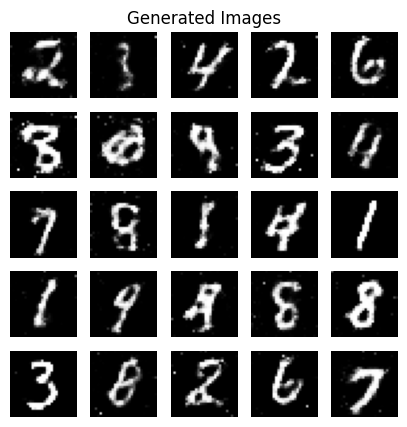

Epoch: 041/050 | d_loss: 0.5828 | g_loss: 1.1342
Epoch: 042/050 | d_loss: 0.5808 | g_loss: 0.9410
Epoch: 043/050 | d_loss: 0.6412 | g_loss: 1.5989
Epoch: 044/050 | d_loss: 0.5733 | g_loss: 0.7553
Epoch: 045/050 | d_loss: 0.6215 | g_loss: 1.2323
Epoch: 046/050 | d_loss: 0.5441 | g_loss: 0.8861
Epoch: 047/050 | d_loss: 0.5320 | g_loss: 1.1439
Epoch: 048/050 | d_loss: 0.6225 | g_loss: 0.9898
Epoch: 049/050 | d_loss: 0.5273 | g_loss: 0.9823
Epoch: 050/050 | d_loss: 0.5545 | g_loss: 0.9804


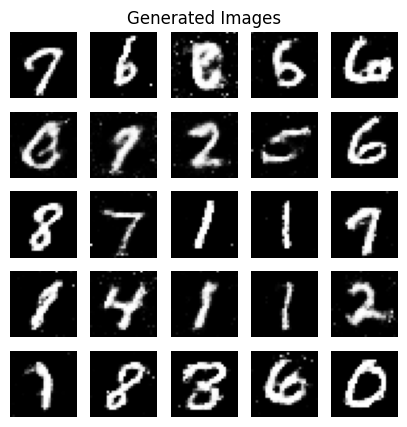

In [ ]:
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)

        # Real and fake labels
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()

        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)

        g_loss = criterion(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        # Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        real_loss = criterion(discriminator(real_imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch: {epoch+1:03d}/{epochs:03d} | "
          f"d_loss: {d_loss.item():.4f} | g_loss: {g_loss.item():.4f}")

    # Show some generated images
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(25, latent_dim, device=device)
            gen_imgs = generator(z).cpu()
        grid = gen_imgs.view(-1, 28, 28).numpy()
        
        plt.figure(figsize=(5,5))
        plt.title("Generated Images")
        plt.axis("off")
        for k in range(25):
            plt.subplot(5,5,k+1)
            plt.imshow(grid[k], cmap="gray")
            plt.axis("off")
        plt.show()
